
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [63]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [64]:
x = np.genfromtxt('respiration.dat')
# sampling frequency of the signal is 500 Hz
fs = 2
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is a measurement of the breathing obtained by inductance<br>
    plethysmography.<br>
    The objective is to estimate the breathing frequency.<br>



 <br>
    The Hilbert transforms permits to estimate the instaneous amplitude and<br>
    phase of a narrow band signal. <br>
   

Q: Comment the figures.<br>

The figure represents a breathing signal presenting the patient's chest movement's amplitude (blue) and the envelope (the module) of the Hilbert transform of the breathing signal. The breathing signal has a range amplitude of ~ -1000 to ~1500 and has several a maximum and a minimum for each breathing cycle. However, the envelope only has the maxima since by definition it is the module value of the Hilbert function. in this graphs, the envelope seems to not just cover the maxima but goes more follows the original signal between said maxima.


Q: Why the envelope does no follow the maxima of the signal<br>
The Hilbert transform can only be used for a narrow band frequencies. The reason the envelope doesn't follow the maxima is most likely that the rage fo frequencies present in the original signal is just too broad, and thus causing this. These broad range of frequencies is mostly likely to noise that has is not related ot the patient breathing. (ie. The beating of the heart et ect.)

compute the analytical signal of x (Hilbert transform)

In [65]:
xa = sp.hilbert(x)

plot the signal

Text(0.5, 1.0, 'Breathing signal')

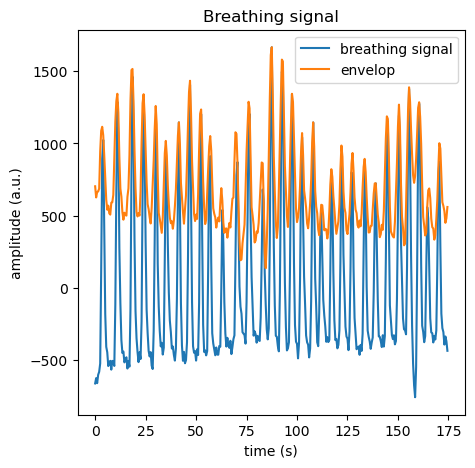

In [66]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x, label='breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.legend(loc='upper right')
py.title('Breathing signal')


<br>
    The raw breathing signal does not fullfil the requirement of narrow band.<br>
    The normal range of frequency for the breathing is within 0.1 to 0.25 Hz.<br>
    The signal is first filtered for this interval.<br>
   

Q: Comment the figures<br>
In this graph, after the band filter (the expected breathing frequencies of 0.1 - 0.25 Hz), along with the attenuation, it can now be seen that the maxima's amplitude has changed to under the 1000s whereas the minima's amplitude doesn't not seem to have changed so drastically.
However, the now filtered signal seams to be smoother that the previous picture and the envelope follows now the maxima.

Q: How is the estimation of the amplitude envelope.<br>
Once the bandwidth narrows, it can now be seen that the envelope amplitude can now correctly estimate the breathing amplitude 

Analogic limit of the passband frequency

In [67]:
f_pass = np.array([0.1, 0.25])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 0.6])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x)

Compute the Hilbert transform.

In [68]:
xa = sp.hilbert(x_bp)

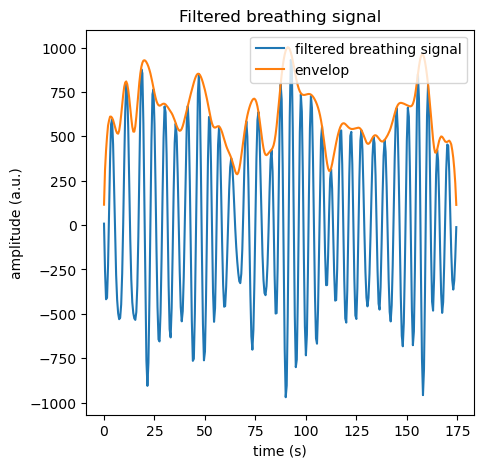

In [69]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t, x_bp, label='filtered breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Filtered breathing signal')
py.legend(loc='upper right')


<br>
    The angle of the Hilbert transform gives the instaneous phase of the signal.<br>
    

Q: Comment the figure.<br>
In these graphs we can see the instantaneous phase of the Hilbert transform of the filtered breathing signal as well as the unwrapped version of the said phase. The instantaneous phase graph shows a sort of periodic (uncontinuous) allure whereas the unwrapped version of it seems to increase with time (has a positive slope) and has better appearance of what we'd be expecting of phase of a signal.


Q: What is the role of the unwrap function<br>
The role of the unwrap function is to reconstruct the Hilbert's phase in a continuous manner  by superposing the each period to each other. Indeed due to the periodic properties of the arctan (bounded between -π and π), the phase of the hilbert transform turns out to be uncontinuous as it be seen in the instantaneous phase graph.

estimate the instantaneous phase from the Hilbert transform

In [70]:
phi_xa = np.angle(xa)
# phase is bounded between -pi and pi -> reconstruct continuous signal
phi_xa_unw = np.unwrap(phi_xa)

Text(0, 0.5, 'instantaneous phase unwrapped (rad)')

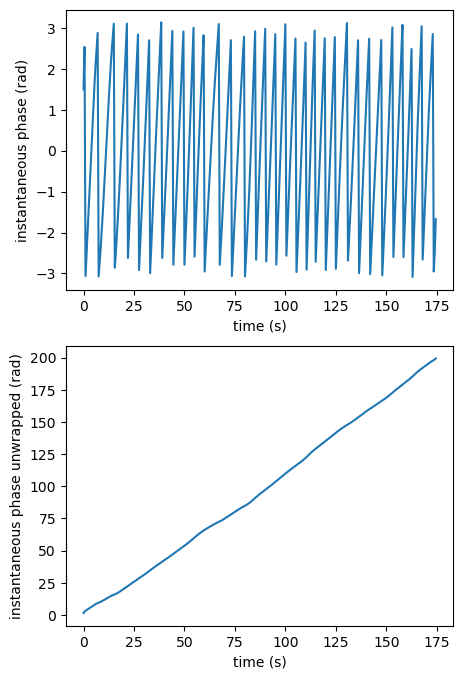

In [71]:
py.figure(3, figsize=[5, 8])
py.clf()
py.subplot(2,1,1)
py.plot(t, phi_xa)
py.xlabel('time (s)')
py.ylabel('instantaneous phase (rad)')
py.subplot(2,1,2)
py.plot(t, phi_xa_unw)
py.xlabel('time (s)')
py.ylabel('instantaneous phase unwrapped (rad)')


<br>
    The time derivate of the instaneous phase is the instaneous frequency of the<br>
    signal.<br>
    

Q: Comment the figure.<br>
The first picture depicts the original raw signal in the top and the breathing rate below. The breathing rate is found by deriving the unwrapped phase of the signal's Hilbert transform.
It can be noticed that the breathing rate is not constant even though, one would expect it from the look of the previous graph of the unwrapped phase of the signal that seems to have a constant positive slope. However, the instantaneous phase graph's as smooth as it might seem, the slope varies a lot between the different points, thus explaining the big variations of the breathing rate.
Plus, it is important to point out due to the way how the derivative is computed numerically - $\frac{d\phi}{dn}=\phi(n)-\phi(n-1)$ - there's an asymptote that is present at t=0. This is due to the fact that the first data point doesn't have n-1 point to calculate the derivative and therefore it should be neglected

Q: Compare the original waveform with the estimation of the breathing frequency<br>
What we can notice by comparing both graphs is that the more the breathing cycles are close to each other the more the breathing frequency is higher and inversely the more the breathing cycle are spaced from each other the more the breathing rate is low. This is very logical since the time between breathing cycles define the breathing rate

compute the derivative of the phase (angular frequency).

In [72]:
d_phi = np.diff(phi_xa_unw)
# convert angular frequency to frequency.
d_phi /= 2*np.pi
# convert digital frequency to analog frequency and in breathing per minute
# (bpm)
d_phi *= fs*60

Text(0, 0.5, 'breathing rate (bpm)')

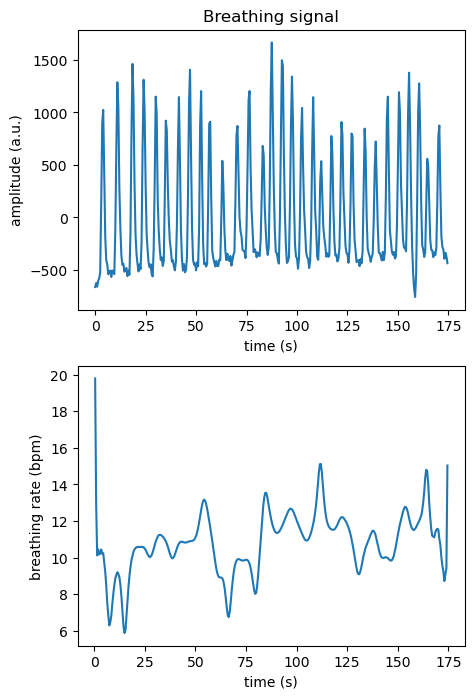

In [73]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x, label='breathing signal')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Breathing signal')
py.subplot(2,1,2)
py.plot(t[1:], d_phi)
py.xlabel('time (s)')
py.ylabel('breathing rate (bpm)')